In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
files=os.listdir("./data/results")

In [3]:
grid = [s for s in files if "grid" in s] # files with results for grid search
random = [s for s in files if "random" in s] 
group = [s for s in files if "group" in s] 

In [4]:
grid_df=pd.DataFrame([])
for file in grid:
    df = pd.read_csv("./data/results/"+file)
    
    df['iter_num']=1
    df.loc[df['experiment_name']!='default params', 
           'iter_num'] = range(1, df.loc[df['experiment_name']!='default params'].shape[0]+1)
    
    grid_df = pd.concat([grid_df, df], sort=False)


group_df=pd.DataFrame([])
for file in group:
    df = pd.read_csv("./data/results/"+file)
    
    df['iter_num'] = range(1, df.shape[0]+1)
    
    group_df = pd.concat([group_df, df], sort=False)
    
random_df=pd.DataFrame([])
for file in random:
    df = pd.read_csv("./data/results/"+file)
    
    df['iter_num'] = range(1, df.shape[0]+1)
    
    random_df = pd.concat([random_df, df], sort=False)

In [5]:
df = pd.concat([grid_df, group_df, random_df], sort=False)

In [6]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_colsample_bytree', 'param_lambda',
       'param_max_depth', 'param_min_child_weight', 'param_subsample',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'experiment_name', 'iter_num',
       'run_number'],
      dtype='object')

In [7]:
time_cols = [ col for col in df.columns if col.find("time")!=-1]

In [8]:
time_cols.extend(['experiment_name', 'run_number'])

In [14]:
tmp = df.loc[:, time_cols].fillna(0)

tmp_time = tmp.groupby(['experiment_name', 'run_number']).sum()

In [20]:
tmp_time.loc["grid search"]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time
run_number,,,,
0.0,377.963461,11.255572,3.918226,0.120981


In [27]:
grid_time = tmp_time.loc["grid search"].values * 5
print("MEAN fit and score time 5 folds:")
print(grid_time[:,0] + grid_time[:,2])
print("MAX fit and score time 5 folds:")
print(grid_time[:,0] + grid_time[:,2] + grid_time[:,1] + grid_time[:,3])
print("MIN fit and score time 5 folds:")
print(grid_time[:,0] + grid_time[:,2] - grid_time[:,1] - grid_time[:,3])
print("REAL TIME:")
print("1940.05")

MEAN fit and score time 5 folds:
[1909.40843344]
MAX fit and score time 5 folds:
[1966.29119757]
MIN fit and score time 5 folds:
[1852.52566931]
REAL TIME:
1940.05


In [6]:
grid_time = 1940.05

random_time = [2073.10, 1991.44, 1941.67,
               1830.35, 1770.31, 1805.24,
               1883.62, 1863.26, 1877.53
              ]

"""
random_time = [
    2148, 2085, 2060, 2158, 2193, 2068, 2045, 2097
]
"""


groups_time = [
    [810.24, 765.14, 742.56, 744.10, 749.14, 
     676.46, 702.35, 749.01, 715.88, 677.28],
    [515.27, 518.78, 519.46, 520.49, 520.53, 
     491.02, 495.51, 497.50, 498.53, 489.28],
    [521.28, 521.50, 522.18, 525.42, 526.47, 
     495.62, 499.08, 499.29, 500.98, 491.89]
]#first, second and third groups
"""
groups_time = [
    [704, 725, 693, 699, 694, 684, 673],
    [491, 489, 489, 488, 490, 489, 489],
    [494, 493, 494, 494, 496, 494, 494]
]#first, second and third groups
"""
default_time = 2.02

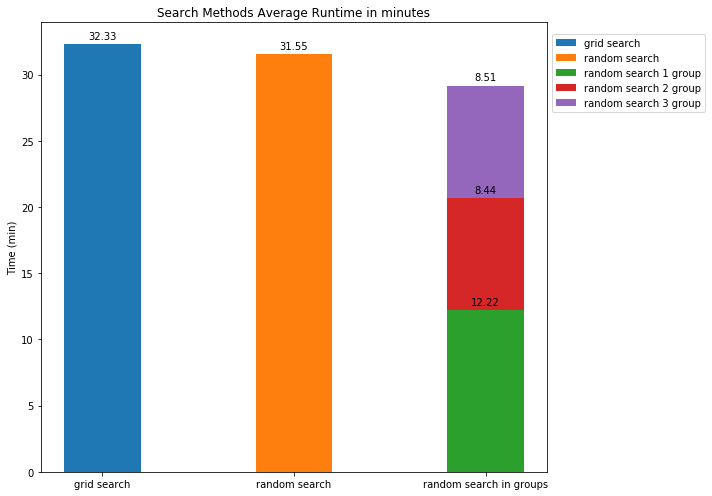

In [7]:
def autolabel(rects, add=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()+add
        ax.annotate('{}'.format(round(height-add,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
x = [0,0.5,1]  
width = 0.2  

fig, ax = plt.subplots(figsize=(10,7))

labels=['grid search','random search', 'random search in groups']

rects1 = ax.bar(0, grid_time/60, width, label='grid search')
rects2 = ax.bar(0.5, np.mean(random_time)/60, width, label='random search')


groups_time_mean = np.mean(groups_time, axis =1)/60
rects3_1 = ax.bar(1, groups_time_mean[0], width, label='random search 1 group')
rects3_2 = ax.bar(1, groups_time_mean[1], width,
             bottom=groups_time_mean[0], label='random search 2 group')
rects3_3 = ax.bar(1, groups_time_mean[2], width,
             bottom=groups_time_mean[0] + groups_time_mean[1], 
                  label='random search 3 group')


ax.set_ylabel('Time (min)')
ax.set_title('Search Methods Average Runtime in minutes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=(1.01,0.8))

autolabel(rects1)
autolabel(rects2)
autolabel(rects3_1)
autolabel(rects3_2, groups_time_mean[0])
autolabel(rects3_3, groups_time_mean[0]+groups_time_mean[1])
fig.tight_layout()

plt.savefig("graphs/1_time_exec.jpg")
plt.show()

In [8]:
top5=df.loc[:,['experiment_name','params','mean_test_score']].sort_values(by='mean_test_score',ascending=False)[:5]

In [9]:
top5 #random search is in top5 than sometimes it may be better than serch in groups

,experiment_name,params,mean_test_score
607,random search for 3 group,"{'colsample_bytree': 0.9441981813670506, 'subs...",0.670763
655,random search for 3 group,"{'colsample_bytree': 0.92725365631945, 'subsam...",0.670091
638,random search for 3 group,"{'colsample_bytree': 0.5211363108799119, 'subs...",0.668882
649,random search,"{'alpha': 0.8756469398389447, 'colsample_bytre...",0.668790
595,random search for 3 group,"{'colsample_bytree': 0.9429017611834876, 'subs...",0.668607


In [10]:
max_interval_length=1
for i in random_df.run_number.unique():
    tmp=pd.DataFrame(random_df.loc[random_df.run_number==i, "mean_test_score"].copy().cummax())
    tmp["run_num"]=random_df.loc[random_df.run_number==i, "iter_num"]
    curr_max=tmp.groupby("mean_test_score").count().reset_index()#.max().values[0]
    #print(curr_max.run_num)
    curr_max=curr_max.loc[curr_max.mean_test_score!=curr_max.mean_test_score.max()]
    
    curr_max=curr_max.run_num.max()
    if curr_max>max_interval_length:
        max_interval_length=curr_max
        
print(max_interval_length)

571


In [11]:
max_interval_length=1
for i in group_df.run_number.unique():
    tmp=pd.DataFrame(group_df.loc[group_df.run_number==i, "mean_test_score"].copy().cummax())
    tmp["run_num"]=group_df.loc[group_df.run_number==i, "iter_num"]
    curr_max=tmp.groupby("mean_test_score").count().reset_index()#.max().values[0]
    #print(curr_max.run_num)
    curr_max=curr_max.loc[curr_max.mean_test_score!=curr_max.mean_test_score.max()]
    
    curr_max=curr_max.run_num.max()
    if curr_max>max_interval_length:
        max_interval_length=curr_max
        
print(max_interval_length)

490


In [12]:
max_interval_length=1
for i in group_df.run_number.unique():
    tmp=pd.DataFrame(group_df.loc[
        (group_df.run_number==i) & (group_df.experiment_name=="random search for 1 group"),
        "mean_test_score"].copy().cummax())

    tmp["run_num"]=group_df.loc[(group_df.run_number==i) & (group_df.experiment_name=="random search for 1 group"), "iter_num"]
    curr_max=tmp.groupby("mean_test_score").count().reset_index()#.max().values[0]
    #print(curr_max.run_num)
    curr_max=curr_max.loc[curr_max.mean_test_score!=curr_max.mean_test_score.max()]
    
    curr_max=curr_max.run_num.max()
    print(curr_max)
    if curr_max>max_interval_length:
        max_interval_length=curr_max
        
#print(max_interval_length)

2
21
10
15
97
43
14
13
105
6


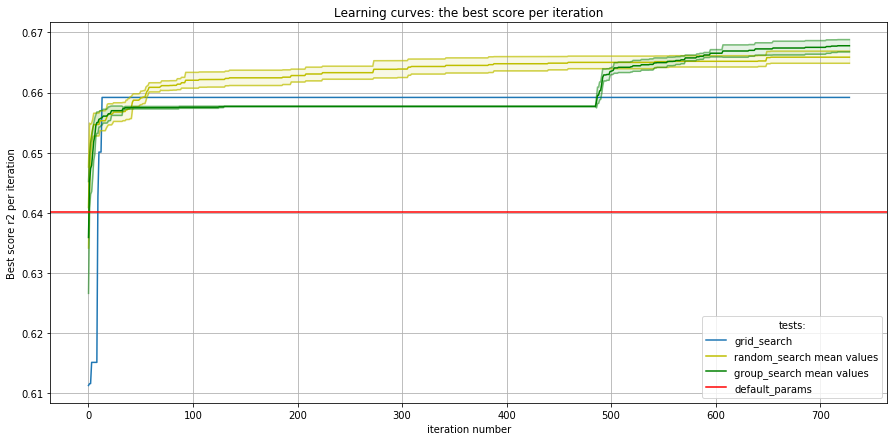

In [13]:
#comparison
# confidence intervals theory get from: 
# https://medium.com/ml-ai-study-group/confidence-interval-confidence-level-be58d250dd40


## GRID_SEARCH
#get best scores per itration for grid_search performance:
grid_perf=grid_df.loc[grid_df['experiment_name']!='default params', 'mean_test_score'].cummax()


## RANDOM_SEARCH
#get best scores per itration for each random_search performance:
random_mean=pd.DataFrame([])
for i in random_df.run_number.unique():
    tmp=pd.DataFrame(random_df.loc[random_df.run_number==i, "mean_test_score"].copy().cummax())
    tmp["iter_num"]=random_df.loc[random_df.run_number==i, "iter_num"]
    random_mean=pd.concat([random_mean, tmp], sort=False)
    
#get mean and confidence interval value for random_search performance on iteration:    

z = 1.96 # for 95% conf interval (coefficient)
# z = 1.64 # for 90% conf interval

n=random_mean.shape[0]/random_mean.iter_num.max() # now n=9, because 4 runs were made for random search
random_std=random_mean.groupby(by="iter_num")['mean_test_score'].std() #std
random_std=(random_std*z)/np.sqrt(n) #confidence interval value 
random_mean=random_mean.groupby(by="iter_num")['mean_test_score'].mean() #mean


## GROUP_SEARCH
#get best scores per itration for each group_search performance (same computations):
group_mean=pd.DataFrame([])
for i in group_df.run_number.unique():
    tmp=pd.DataFrame(group_df.loc[group_df.run_number==i, "mean_test_score"].cummax())
    tmp["iter_num"]=group_df.loc[group_df.run_number==i, "iter_num"]
    group_mean=pd.concat([group_mean, tmp], sort=False)

n=group_mean.shape[0]/group_mean.iter_num.max() # now n=10
group_std=group_mean.groupby(by="iter_num")['mean_test_score'].std()
group_std=(group_std*z)/np.sqrt(n) 
group_mean=group_mean.groupby(by="iter_num")['mean_test_score'].mean()

## DEFAULT performance
default_perf=grid_df.loc[grid_df['experiment_name']=='default params', 'mean_test_score']


## PLOT
plt.figure(figsize=(15,7))
plt.grid()
x=list(range(0, grid_perf.shape[0]))

#grid plot:
plt.plot(x, grid_perf, label="grid_search")

#conf for random:
plt.plot(x, random_mean, color="y", label="random_search mean values")
lower_random=random_mean - random_std
upper_random=random_mean + random_std
plt.plot(x, lower_random, alpha=0.7, color="y")
plt.plot(x, upper_random, alpha=0.7, color="y")
plt.fill_between(x, lower_random, upper_random, alpha=0.1, color="y") 

#conf for group:
plt.plot(x, group_mean, color="green", label="group_search mean values")
lower_group=group_mean - group_std
upper_group=group_mean + group_std
plt.plot(x, lower_group, alpha=0.5, color="green")
plt.plot(x, upper_group, alpha=0.5, color="green")
plt.fill_between(x, lower_group, upper_group, alpha=0.1, color="green")

#line for default values
plt.axhline(default_perf.values, label="default_params", color='r')

plt.legend(title='tests:')
plt.title("Learning curves: the best score per iteration")
plt.ylabel("Best score r2 per iteration")
plt.xlabel("iteration number")
plt.savefig("graphs/2_scores.jpg")
plt.show()

In [14]:
#print("green last lower values: ", lower_group.iloc[-11:-1])
#print("yellow last upper values: ", upper_random.iloc[0:10])
print("difference: ", ((lower_group.iloc[-1:].values-upper_random.iloc[-1:].values) > 0).all())
print("difference is less than zero than intervals don't intersect in last point")

difference:  False
difference is less than zero than intervals don't intersect in last point


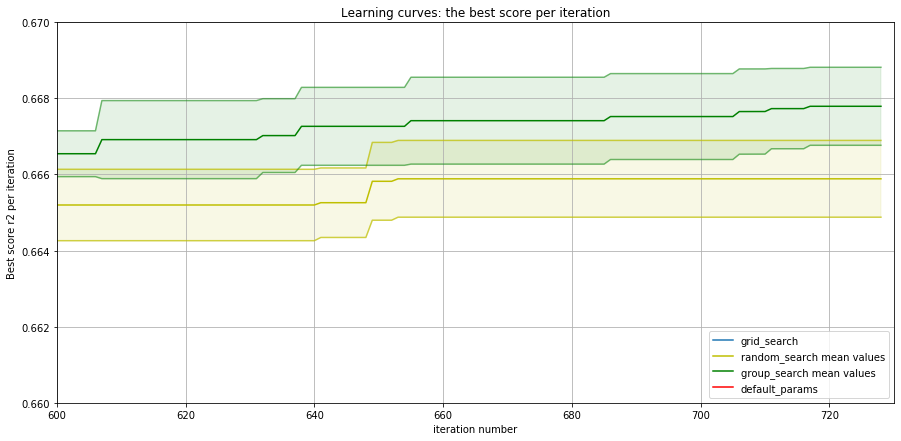

In [15]:
#comparison
# confidence intervals theory get from: 
# https://medium.com/ml-ai-study-group/confidence-interval-confidence-level-be58d250dd40

## PLOT
plt.figure(figsize=(15,7))
plt.grid()
x=list(range(0, grid_perf.shape[0]))

#grid plot:
plt.plot(x, grid_perf, label="grid_search")

#conf for random:
plt.plot(x, random_mean, color="y", label="random_search mean values")
plt.plot(x, lower_random, alpha=0.7, color="y")
plt.plot(x, upper_random, alpha=0.7, color="y")
plt.fill_between(x, lower_random, upper_random, alpha=0.1, color="y") 

#conf for group:
plt.plot(x, group_mean, color="green", label="group_search mean values")
plt.plot(x, lower_group, alpha=0.5, color="green")
plt.plot(x, upper_group, alpha=0.5, color="green")
plt.fill_between(x, lower_group, upper_group, alpha=0.1, color="green")

#line for default values
plt.axhline(default_perf.values, label="default_params", color='r')

plt.legend(title='tests:')
plt.title("Learning curves: the best score per iteration")
plt.ylabel("Best score r2 per iteration")
plt.xlabel("iteration number")
plt.xlim(600,730)
plt.ylim(0.66, 0.67)
plt.legend(loc="lower right")
plt.savefig("graphs/2_scores_scaled.jpg")
plt.show()

In [16]:
tmp=grid_df.loc[grid_df['experiment_name']!='default params', 'mean_test_score'].cummax().reset_index()
curr_max=tmp.groupby("mean_test_score").count().reset_index()
max_score=curr_max.loc[curr_max["index"]>=100, "mean_test_score"].values[0]

tmp_before=tmp.loc[tmp["mean_test_score"]<max_score] #get steps before stop criterion
tmp_stop=tmp.loc[tmp["mean_test_score"]==max_score].sort_values(by="index")
tmp_stop=tmp_stop.iloc[:100]
grid_df_stopped=pd.concat([tmp_before, tmp_stop], sort = False)

print(grid_df_stopped.shape)

(113, 2)


In [17]:
## RANDOM_SEARCH
#get best scores per itration for each random_search performance:
random_df_stopped=pd.DataFrame([])
for i in random_df.run_number.unique():
    tmp=pd.DataFrame(random_df.loc[random_df.run_number==i, "mean_test_score"].copy().cummax())
    tmp["iter_num"]=random_df.loc[random_df.run_number==i, "iter_num"]
    curr_max=tmp.groupby("mean_test_score").count().reset_index()
    max_score=curr_max.loc[curr_max["iter_num"]>=100, "mean_test_score"].values[0]
    
    tmp_before=tmp.loc[tmp["mean_test_score"]<max_score] #get steps before stop criterion
    tmp_stop=tmp.loc[tmp["mean_test_score"]==max_score].sort_values(by="iter_num")
    tmp_stop=tmp_stop.iloc[:100]
    df_stopped=pd.concat([tmp_before, tmp_stop], sort = False)  
    df_stopped['run_number']=i
    print(df_stopped.shape)    
    
    random_df_stopped=pd.concat([random_df_stopped, df_stopped], sort=False)

(170, 3)
(308, 3)
(140, 3)
(235, 3)
(206, 3)
(214, 3)
(157, 3)
(193, 3)
(138, 3)
(189, 3)


In [23]:
arr=[170, 308, 140, 235, 206, 214, 157, 193, 138, 189]
print(np.mean(arr))
print(np.std(arr))

195.0
48.20165972246184


In [28]:
## GROUP_SEARCH
# get best scores per itration for each group_search performance:
# we can do it on this way because 
# in first group more than 100 iterations without growth was got once
# second group hasn't any influence

group_df_stopped=pd.DataFrame([])
for i in group_df.run_number.unique():
    print(i)
    for j in group_df.experiment_name.unique():
        tmp=pd.DataFrame(group_df.loc[
            (group_df.run_number==i) & (group_df.experiment_name==j),
            "mean_test_score"].copy().cummax())
        tmp["iter_num"]=group_df.loc[
            (group_df.run_number==i) & (group_df.experiment_name==j), 
            "iter_num"]
        curr_max=tmp.groupby("mean_test_score").count().reset_index()
        #print(curr_max)
        try:
            max_score=curr_max.loc[curr_max["iter_num"]>=100, "mean_test_score"].values[0]
            tmp_before=tmp.loc[tmp["mean_test_score"]<max_score] #get steps before stop criterion
            tmp_stop=tmp.loc[tmp["mean_test_score"]==max_score].sort_values(by="iter_num")
            tmp_stop=tmp_stop.iloc[:100]
            group_df_stopped_exp=pd.concat([tmp_before, tmp_stop], sort = False) 
        except:
            group_df_stopped_exp=tmp         

        group_df_stopped_exp['run_number']=i
        #print(group_df_stopped_exp.shape)    
        group_df_stopped=pd.concat([group_df_stopped, group_df_stopped_exp], sort=False)

8
   mean_test_score  iter_num
0         0.648758         2
1         0.657690       241
   mean_test_score  iter_num
0          0.65769       243
   mean_test_score  iter_num
0         0.655148         1
1         0.656348         2
2         0.656918         3
3         0.663776        27
4         0.664641        41
5         0.664919        22
6         0.666765       124
7         0.668075        23
3
   mean_test_score  iter_num
0         0.610381         1
1         0.631454         3
2         0.633974         1
3         0.642777         2
4         0.650594         3
5         0.653189         2
6         0.654305         2
7         0.657019        21
8         0.657690       208
   mean_test_score  iter_num
0          0.65769       243
   mean_test_score  iter_num
0         0.656925         3
1         0.658379         1
2         0.658741         1
3         0.662534         9
4         0.663089         2
5         0.663970         5
6         0.664638        60
7         

In [27]:
arr1=[102, 135, 118, 119, 230, 187, 121, 135, 120, 111]
arr2=100
arr3=[196, 199, 151, 243, 203, 243, 155, 243, 117, 168]
print(np.min(arr1))
print(np.max(arr1))
print(np.mean(arr1))
print(np.std(arr1))

print(np.min(arr3))
print(np.max(arr3))
print(np.mean(arr3))
print(np.std(arr3))

102
230
137.8
37.791004220581385
117
243
191.8
41.52059729820851


In [35]:
arr_sum=np.add(arr1,arr3)+100
print(np.min(arr_sum))
print(np.max(arr_sum))
print(np.mean(arr_sum))
print(np.std(arr_sum))

337
533
429.6
65.46938215685252


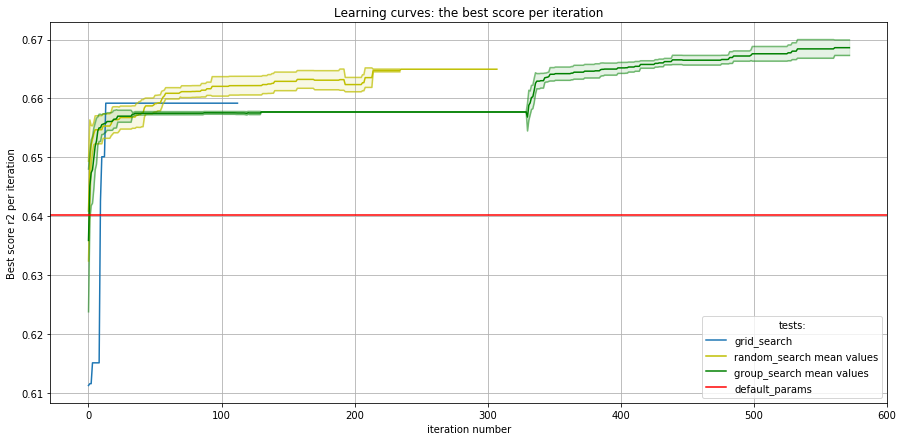

In [19]:
# Data with stop criterion
# stop if the cumulative score hasn't grown in 100 iterations

## GRID_SEARCH
# get best scores per itration for grid_search performance:
# grid_df_stopped

## RANDOM_SEARCH
# get best scores per itration for each random_search performance:
# random_df_stopped
    
#get mean and confidence interval value for random_search performance on iteration:    

z = 1.96 # for 95% conf interval (coefficient)
# z = 1.64 # for 90% conf interval

n=random_df_stopped.shape[0]/random_df_stopped.iter_num.max() # now n=9, because 4 runs were made for random search
random_std=random_df_stopped.groupby(by="iter_num")['mean_test_score'].std() #std
random_std=(random_std*z)/np.sqrt(n) #confidence interval value 
random_mean=random_df_stopped.groupby(by="iter_num")['mean_test_score'].mean() #mean


## GROUP_SEARCH
#get best scores per itration for each group_search performance (same computations):

n=group_df_stopped.shape[0]/group_df_stopped.iter_num.max() # now n=10
group_std=group_df_stopped.groupby(by="iter_num")['mean_test_score'].std()
group_std=(group_std*z)/np.sqrt(n) 
group_std=group_std.fillna(0)
group_mean=group_df_stopped.groupby(by="iter_num")['mean_test_score'].mean()

## DEFAULT performance
default_perf=grid_df.loc[grid_df['experiment_name']=='default params', 'mean_test_score']


## PLOT
plt.figure(figsize=(15,7))
plt.grid()

#grid plot:
x=list(range(0, grid_df_stopped.shape[0]))
plt.plot(x, grid_df_stopped['mean_test_score'], label="grid_search")

#conf for random:
x=list(range(0, random_mean.shape[0]))
plt.plot(x, random_mean, color="y", label="random_search mean values")
lower_random=random_mean - random_std
upper_random=random_mean + random_std
plt.plot(x, lower_random, alpha=0.7, color="y")
plt.plot(x, upper_random, alpha=0.7, color="y")
plt.fill_between(x, lower_random, upper_random, alpha=0.1, color="y") 

#conf for group:
x=list(range(0, group_mean.shape[0]))
plt.plot(x, group_mean, color="green", label="group_search mean values")
lower_group=group_mean - group_std
upper_group=group_mean + group_std
plt.plot(x, lower_group, alpha=0.5, color="green")
plt.plot(x, upper_group, alpha=0.5, color="green")
plt.fill_between(x, lower_group, upper_group, alpha=0.1, color="green")

#line for default values
plt.axhline(default_perf.values, label="default_params", color='r')

plt.legend(title='tests:')
plt.title("Learning curves: the best score per iteration")
plt.ylabel("Best score r2 per iteration")
plt.xlabel("iteration number")
plt.savefig("graphs/2_scores.jpg")
plt.show()

In [20]:
f

NameError: name 'f' is not defined

In [ ]:
df.loc[df.experiment_name=="grid search", "run_number"]=1

In [ ]:
df.loc[df.experiment_name == 'default params','mean_test_score']

In [ ]:
best_scores=df.groupby(by=['experiment_name', 'run_number'])['mean_test_score'].max().reset_index()
#print("best scores:")
#print(best_scores)

best=pd.merge(df, best_scores, how='inner', on=['experiment_name','run_number','mean_test_score']).loc[:,['experiment_name','mean_test_score', 'params', 'iter_num','run_number']]
#best step and params

In [ ]:
print("MEAN:")
print(best_scores.groupby(by='experiment_name')['mean_test_score'].mean())
print("STD:")
print(best_scores.groupby(by='experiment_name')['mean_test_score'].std())

In [ ]:
best_iter=best.groupby(by=['experiment_name', 'run_number'])['iter_num'].min().reset_index()

In [ ]:
params=pd.merge(df, best_iter, how='inner', on=['experiment_name','iter_num','run_number'])

In [ ]:
best_iter.loc[best_iter.experiment_name=="random search for 2 group", "iter_num"]-=(729/3)
best_iter.loc[best_iter.experiment_name=="random search for 3 group", "iter_num"]-=(2*729/3)

In [ ]:
#cols=params.experiment_name.values
vals=params.loc[:, ["experiment_name", "params"]]
for i in vals.experiment_name.unique():
    print(i)
    tmp=(vals.loc[vals.experiment_name==i, 'params'])
    tmp=tmp.apply(lambda x: eval(x)).apply(pd.Series)
    print("MEAN:")
    print(tmp.mean())
    print("STD:")
    print(tmp.std())
    
    print("====")

In [ ]:
# on which min step algo get best result 
import math
best_iter=best_iter.loc[best_iter['experiment_name']!='default params'].reset_index(drop=True)
x = np.arange(best_iter.shape[0])  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))

labels_prefix=best_iter.loc[:,'experiment_name']
labels_postfix=best_iter.loc[:,'run_number']
labels=np.sum((labels_prefix.values+" ", labels_postfix.values.astype(int).astype(str)), axis=0)+" run"

rects=[]
for row in range(best_iter.shape[0]):
    rects.append(ax.bar(row, best_iter.loc[row,'iter_num'], width, label=labels[row]))
    autolabel(rects[row])

ax.set_ylabel('Step num')
ax.set_title('Step number at which the optimum was reached')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

fig.tight_layout()

plt.savefig("graphs/3_best_step.jpg")
plt.show()

In [ ]:
print("MEAN:")
print(best_iter.groupby(by="experiment_name")["iter_num"].mean())
print("STD: ")
print(best_iter.groupby(by="experiment_name")["iter_num"].std())

In [ ]:
#random search in groups has null values
df.loc[df.experiment_name=='random search for 1 group',
                  'param_alpha']=0
df.loc[df.experiment_name=='random search for 1 group',
                  'param_colsample_bytree']=1
df.loc[df.experiment_name=='random search for 1 group',
                  'param_lambda']=1
df.loc[df.experiment_name=='random search for 1 group',
                  'param_subsample']=1

In [ ]:
df.loc[df.experiment_name=='random search for 2 group',
                  'param_max_depth']=5
df.loc[df.experiment_name=='random search for 2 group',
                  'param_colsample_bytree']=1
df.loc[df.experiment_name=='random search for 2 group',
                  'param_min_child_weight']=9
df.loc[df.experiment_name=='random search for 2 group',
                  'param_subsample']=1

In [ ]:
df.loc[df.experiment_name=='random search for 3 group',
                  'param_max_depth']=5
df.loc[df.experiment_name=='random search for 3 group',
                  'param_min_child_weight']=9


In [ ]:
max_iter=df.loc[(df.experiment_name=='random search for 2 group'),"iter_num"].max()
lost_params=df.loc[(df.experiment_name=='random search for 2 group')
                  &(df.iter_num==max_iter), ['param_lambda', 'param_alpha','run_number']]

In [ ]:
cols_names=df.columns.tolist()
cols_names.remove("param_alpha")
cols_names.remove("param_lambda")

In [ ]:
df.loc[df.experiment_name=='random search for 3 group'
      ]=df.loc[df.experiment_name=='random search for 3 group',
                  cols_names].merge(lost_params, on = "run_number", how="inner")

In [ ]:
tmp=df.loc[df.experiment_name.astype(str).str.contains('group'),['param_alpha', 'param_colsample_bytree', 'param_lambda',
       'param_max_depth', 'param_min_child_weight', 'param_subsample']]
print("Null values amount:")
print(tmp.isnull().sum())

In [ ]:
tmp=df.loc[df.experiment_name.astype(str).str.contains('default'),['param_alpha', 'param_colsample_bytree', 'param_lambda',
       'param_max_depth', 'param_min_child_weight', 'param_subsample']]
print("Null values amount:")
print(tmp.isnull().sum())

In [ ]:
df.loc[df.experiment_name.astype(str).str.contains('default'),[
    'param_alpha', 'param_colsample_bytree', 'param_lambda',
       'param_min_child_weight', 'param_subsample']]=[0,1,1,1,1]

In [ ]:
#params influence
params_list=['param_alpha', 'param_colsample_bytree',
       #'param_gamma', 
             'param_lambda', 'param_max_depth',
       'param_min_child_weight', 'param_subsample']

df.loc[df.experiment_name.astype(str).str.contains("group"), "experiment_name"] = "group search"


exp_list = ("random search", "group search", "grid search", "default params")
color_list = ("y","green", "b", "r")
for param in params_list:    
    plt.figure(figsize=(15,7))  
    
    for exp_name, color in zip(exp_list, color_list):            
        data = df.loc[df.experiment_name == exp_name]
        x=data.loc[:,param]
        y=data.loc[:,'mean_test_score']
        plt.scatter(x, y, color = color, alpha=1, label = exp_name)
        
    plt.title(param+" influence on scores")
    plt.xlabel(param)
    plt.ylabel("score r2")
    plt.legend()
    plt.savefig("graphs/4 {} influence.jpg".format(param))
    plt.show()